# Import the package

In [1]:
from datetime import datetime
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import mean
from numpy import std
from numpy import sort
import pandas as pd
from pandas.core.frame import DataFrame
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import f1_score  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score, plot_confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper,DeltaYStopper
from skopt.space import Real,Categorical,Integer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import joblib
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

# Datasets

## Original dataset

In [2]:
HDData=pd.read_csv('heart disease.csv')


In [3]:
HDData1=HDData.copy()

In [4]:
HDData1['type']=np.where(HDData1["num"]==0,'Normal','Abnormal')  
HDData1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,type
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Normal
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Abnormal
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Abnormal
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Normal
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Normal


#  Build the model

##  Light GBM

In [5]:
HDData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [6]:
HDData.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


## Fullfilled binary dataset

In [7]:
HDbi=pd.read_csv('Filled Binary HD.csv')
# ,index_col=0)
HDbi.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Selected feature dataset

In [8]:
features10=pd.read_csv('HD selected 10 features.csv')
# ,index_col=0)
features10.head()

,age,sex,cp,chol,restecg,thalach,exang,oldpeak,ca,thal,label
0,63,1,1,233,2,150,0,2.3,0,6,0
1,67,1,4,286,2,108,1,1.5,3,3,1
2,67,1,4,229,2,129,1,2.6,2,7,1
3,37,1,3,250,0,187,0,3.5,0,3,0
4,41,0,2,204,2,172,0,1.4,0,3,0


In [9]:
X1=features10.drop(labels=['label'],axis=1)

y1=features10['label'].values

In [10]:
scaler=StandardScaler()
scaler.fit(X1)
X1=scaler.transform(X1)
#split train dataset and test dataset


In [11]:
X1_train, X1_test, y1_train, y1_test =train_test_split(X1, y1,test_size=0.20, random_state=0, stratify=y1)

In [12]:
lgbm=LGBMClassifier(boosting_type='gbdt',
                                 max_depth=8, num_leaves=8,
                                learning_rate=0.01,n_estimators=300,
                                colsample_bytree= 0.5,subsample= 0.5)

In [13]:
lgbm.fit(X1_train, y1_train)

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=8,
               n_estimators=300, num_leaves=8, subsample=0.5)

In [14]:
y_pred_lgbm1=lgbm.predict(X1_test)
y_prob_lgbm1=lgbm.predict_proba(X1_test)[:, 1]
print("Accuracy score with LGBM is: ",accuracy_score(y1_test, y_pred_lgbm1))
print("F1 score with LGBM is: ",f1_score(y1_test, y_pred_lgbm1,average='micro'))
print("ROC_AUC score with LGBM is: ", roc_auc_score(y1_test,y_prob_lgbm1))
print("Cross entropy loss score with LGBM is: ",log_loss(y1_test,y_prob_lgbm1))


Accuracy score with LGBM is:  0.8360655737704918
F1 score with LGBM is:  0.8360655737704918
ROC_AUC score with LGBM is:  0.9404761904761905
Cross entropy loss score with LGBM is:  0.3493712430687207


In [15]:
start=datetime.now()
lgbm_hd=lgbm.fit(X1_train,y1_train)
stop=datetime.now()
execution_time_lgbm4=(stop-start)

print(execution_time_lgbm4)

0:00:00.069006


In [16]:


start=datetime.now()
accuracy_score_10 =cross_val_score(lgbm, X1_train, y1_train, cv=5,scoring='accuracy').mean()
F1_score_10 =cross_val_score(lgbm, X1_train, y1_train, cv=5,scoring='f1_micro').mean()
roc_auc_score_10 =cross_val_score(lgbm, X1_train, y1_train, cv=5,scoring='roc_auc_ovr').mean()
neg_loss_score_10 =cross_val_score(lgbm, X1_train, y1_train, cv=5,scoring='neg_log_loss').mean()

stop=datetime.now()
execution_time_lgbm4=(stop-start)/20
execution_time_lgbm4

print("accuracy 10  feature:",accuracy_score_10)
print('F1 score 10  feature:',F1_score_10)
print('roc_auc 10  feature:',roc_auc_score_10)
print("cross entropy loss 10  feature:",neg_loss_score_10)

accuracy 10  feature: 0.8097789115646258
F1 score 10  feature: 0.8097789115646258
roc_auc 10  feature: 0.9029160050899181
cross entropy loss 10  feature: -0.40509187173409533


In [17]:
training_time_lgbm=execution_time_lgbm4.total_seconds()
training_time_lgbm='%.4f'%training_time_lgbm
print(training_time_lgbm)

0.0331


In [18]:
lgbm_accuracy='%.4f'%accuracy_score(y1_test, y_pred_lgbm1)
lgbm_f1='%.4f'%f1_score(y1_test, y_pred_lgbm1,average='micro')
lgbm_roc_auc='%.4f'% roc_auc_score(y1_test,y_prob_lgbm1)
lgbm_loss='%.4f'%log_loss(y1_test,y_prob_lgbm1)
print(lgbm_accuracy)
print(lgbm_f1)
print(lgbm_roc_auc)
print(lgbm_loss)

0.8361
0.8361
0.9405
0.3494


In [19]:
# save the model
joblib.dump(lgbm_hd,'lgbm_hd.model')

['lgbm_hd.model']

In [20]:
   #加载模型
RFlgmb=joblib.load('lgbm_hd.model')
   #应用模型进行预测
resultlgmb=RFlgmb.score(X1_test,y1_test)

In [21]:
resultlgmb

0.8360655737704918

## SVM

In [22]:
svc2= SVC(
    C=0.1
     ,kernel='linear'
    , probability=True, random_state=42)


In [23]:
svc_hd=svc2.fit(X1_train,y1_train)
y_pred_svc2=svc2.predict(X1_test)
y_prob_svc2=svc2.predict_proba(X1_test)[:,1]
print("Accuracy score with LGBM is: ",accuracy_score(y1_test, y_pred_svc2))
print("F1 score with LGBM is: ",f1_score(y1_test, y_pred_svc2,average='micro'))
print("ROC_AUC score with LGBM is: ", roc_auc_score(y1_test,y_prob_svc2))
print("Cross entropy loss score with LGBM is: ",log_loss(y1_test,y_prob_svc2))


Accuracy score with LGBM is:  0.8524590163934426
F1 score with LGBM is:  0.8524590163934426
ROC_AUC score with LGBM is:  0.948051948051948
Cross entropy loss score with LGBM is:  0.32583070798834746


In [24]:
start=datetime.now()
accuracy_score_10_svm =cross_val_score(svc2, X1_train, y1_train, cv=5,scoring='accuracy').mean()
F1_score_10_svm =cross_val_score(svc2, X1_train, y1_train, cv=5,scoring='f1_micro').mean()
roc_auc_score_10_svm =cross_val_score(svc2, X1_train, y1_train, cv=5,scoring='roc_auc_ovr').mean()
neg_loss_score_10_svm =cross_val_score(svc2, X1_train, y1_train, cv=5,scoring='neg_log_loss').mean()

stop=datetime.now()
execution_time_svm=(stop-start)/20
execution_time_svm

print("accuracy 10  feature:",accuracy_score_10_svm)
print('F1 score 10  feature:',F1_score_10_svm)
print('roc_auc 10  feature:',roc_auc_score_10_svm)
print("cross entropy loss 10  feature:",neg_loss_score_10_svm)

accuracy 10  feature: 0.8470238095238095
F1 score 10  feature: 0.8470238095238095
roc_auc 10  feature: 0.8961245678636983
cross entropy loss 10  feature: -0.4042797609932098


In [25]:
training_time_svm=execution_time_svm.total_seconds()
training_time_svm='%.4f'%training_time_svm
print(training_time_svm)

0.0058


In [26]:
svc_accuracy='%.4f'%accuracy_score(y1_test, y_pred_svc2)
svc_f1='%.4f'%f1_score(y1_test, y_pred_svc2,average='micro')
svc_roc_auc='%.4f'% roc_auc_score(y1_test,y_prob_svc2)
svc_loss='%.4f'%log_loss(y1_test,y_prob_svc2)
print(svc_accuracy)
print(svc_f1)
print(svc_roc_auc)
print(svc_loss)

0.8525
0.8525
0.9481
0.3258


In [27]:
  #保存模型
joblib.dump(svc_hd,'svc_hd.model')

['svc_hd.model']

In [28]:
   #加载模型
RFsvc=joblib.load('svc_hd.model')
   #应用模型进行预测
resultsvc=RFsvc.score(X1_test,y1_test)

In [29]:
resultsvc

0.8524590163934426

# Random Forest

In [30]:
rf2= RFC(random_state=42, max_features='sqrt', n_estimators= 100,
                                     max_depth=7, 
                                     criterion='entropy')


In [31]:
start=datetime.now()
accuracy_score_10_rf =cross_val_score(rf2, X1_train, y1_train, cv=5,scoring='accuracy').mean()
F1_score_10_rf =cross_val_score(rf2, X1_train, y1_train, cv=5,scoring='f1_micro').mean()
roc_auc_score_10_rf =cross_val_score(rf2, X1_train, y1_train, cv=5,scoring='roc_auc_ovr').mean()
neg_loss_score_10_rf =cross_val_score(rf2, X1_train, y1_train, cv=5,scoring='neg_log_loss').mean()

stop=datetime.now()
execution_time_rf=(stop-start)/20
execution_time_rf

print("accuracy 10  feature:",accuracy_score_10_rf)
print('F1 score 10  feature:',F1_score_10_rf)
print('roc_auc 10  feature:',roc_auc_score_10_rf)
print("cross entropy loss 10  feature:",neg_loss_score_10_rf)

accuracy 10  feature: 0.8181972789115646
F1 score 10  feature: 0.8181972789115646
roc_auc 10  feature: 0.9000061934844543
cross entropy loss 10  feature: -0.3969826587746892


In [32]:
training_time_rf=execution_time_rf.total_seconds()
training_time_rf='%.4f'%training_time_rf
print(training_time_rf)

0.1153


In [33]:
rf_hd=rf2.fit(X1_train,y1_train)
y_pred_rf2=rf2.predict(X1_test)
y_prob_rf2=rf2.predict_proba(X1_test)[:,1]
print("Accuracy score with RF is: ",accuracy_score(y1_test, y_pred_rf2))
print("F1 score with RF is: ",f1_score(y1_test, y_pred_rf2,average='micro'))
print("ROC_AUC score with RF is: ", roc_auc_score(y1_test,y_prob_rf2))
print("Cross entropy loss score with RF is: ",log_loss(y1_test,y_prob_rf2))


rf_accuracy='%.4f'%accuracy_score(y1_test, y_pred_rf2)
rf_f1='%.4f'%f1_score(y1_test, y_pred_rf2,average='micro')
rf_roc_auc='%.4f'% roc_auc_score(y1_test,y_prob_rf2)
rf_loss='%.4f'%log_loss(y1_test,y_prob_rf2)
print(rf_accuracy)
print(rf_f1)
print(rf_roc_auc)
print(rf_loss)

Accuracy score with RF is:  0.8852459016393442
F1 score with RF is:  0.8852459016393442
ROC_AUC score with RF is:  0.9307359307359306
Cross entropy loss score with RF is:  0.3635394418917459
0.8852
0.8852
0.9307
0.3635


In [34]:
# save the model
joblib.dump(rf_hd,'rf_hd.model')

['rf_hd.model']

In [35]:
   #加载模型
RFrf=joblib.load('rf_hd.model')
   #应用模型进行预测
rfresult=RFrf.score(X1_test,y1_test)

In [36]:
rfresult

0.8852459016393442

# Neural Network

In [37]:

X1_train = torch.from_numpy(X1_train)
y1_train = torch.from_numpy(y1_train ).type(torch.LongTensor)

X1_test  = torch.from_numpy(X1_test )
y1_test= torch.from_numpy(y1_test).type(torch.LongTensor)

batch_size = 128

train = torch.utils.data.TensorDataset(X1_train, y1_train )
test = torch.utils.data.TensorDataset(X1_test , y1_test)


train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=True)

In [38]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2, output_dim):
        super(ANNModel, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU() 
        
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


In [39]:
epochs =30

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
input_dim = X1.shape[1]
hidden_dim1 = 104#hidden layer1
hidden_dim2 = 66 #hidden layer2 
output_dim = len(set(y1))

In [40]:
model = ANNModel(input_dim, hidden_dim1,hidden_dim2,output_dim)


learning_rate = 0.0021
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()


In [41]:
start=datetime.now()

total_step = len(train_loader)
model.train()
for epoch in range(epochs):
    tot_loss = 0.0
    tot_acc = 0.0
    train_preds = []
    train_trues = []
  # model.train()
    for i,(train_data_batch, train_label_batch) in enumerate(train_loader):
        train_data_batch = train_data_batch.float().to(device) 
        train_label_batch = train_label_batch.to(device)
        outputs = model(train_data_batch)
        # _, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, train_label_batch)
        # print(loss)
      
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
     
        tot_loss += loss.data
        train_outputs = outputs.argmax(dim=1)
        train_preds.extend(train_outputs.detach().cpu().numpy())
        train_trues.extend(train_label_batch.detach().cpu().numpy())
        # tot_acc += (outputs.argmax(dim=1) == train_label_batch).sum().item()
        sklearn_accuracy = accuracy_score(train_trues, train_preds)
        sklearn_precision = precision_score(train_trues, train_preds, average='micro')
        sklearn_recall = recall_score(train_trues, train_preds, average='micro')
        sklearn_f1 = f1_score(train_trues, train_preds, average='micro')
        print("[sklearn_metrics] Epoch:{} loss:{:.4f} accuracy:{:.4f} precision:{:.4f} recall:{:.4f} f1:{:.4f}".format(epoch, tot_loss, sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_f1))
stop=datetime.now()
execution_time_ann=(stop-start)
execution_time_ann='%.4f'%(execution_time_ann).total_seconds()
print('execution_time_ann',execution_time_ann)
test_preds = []
test_trues = []
model.eval()
with torch.no_grad():
    for i,(test_data_batch, test_data_label) in enumerate(test_loader):
        test_data_batch = test_data_batch.float().to(device) # 将double数据转换为float
        test_data_label = test_data_label.to(device)
        test_outputs = model(test_data_batch)
        
        probs = F.softmax(test_outputs, dim=1)
        test_outputs = test_outputs.argmax(dim=1)
        testloss = criterion(probs, test_data_label)
#         preds = torch.argmax(logits, dim=1)
        test_preds.extend(test_outputs.detach().cpu().numpy())
        test_trues.extend(test_data_label.detach().cpu().numpy())
        sklearn_accuracy = accuracy_score(test_trues, test_preds)
        sklearn_precision = precision_score(test_trues, test_preds, average='micro')
        sklearn_recall = recall_score(test_trues, test_preds, average='micro')
        sklearn_f1 = f1_score(test_trues, test_preds, average='micro')
        print("Loss score is: ", log_loss(test_data_label,probs))
        print(classification_report(test_trues, test_preds))
        conf_matrix = confusion_matrix(test_trues, test_preds)
        print(conf_matrix)
#         plot_confusion_matrix(conf_matrix)
        print("[sklearn_metrics] accuracy:{:.4f} precision:{:.4f} recall:{:.4f} f1:{:.4f}".format(sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_f1))

[sklearn_metrics] Epoch:0 loss:0.7212 accuracy:0.4453 precision:0.4453 recall:0.4453 f1:0.4453
[sklearn_metrics] Epoch:0 loss:1.3956 accuracy:0.4959 precision:0.4959 recall:0.4959 f1:0.4959
[sklearn_metrics] Epoch:1 loss:0.6396 accuracy:0.7422 precision:0.7422 recall:0.7422 f1:0.7422
[sklearn_metrics] Epoch:1 loss:1.2440 accuracy:0.7562 precision:0.7562 recall:0.7562 f1:0.7562
[sklearn_metrics] Epoch:2 loss:0.5820 accuracy:0.8281 precision:0.8281 recall:0.8281 f1:0.8281
[sklearn_metrics] Epoch:2 loss:1.1091 accuracy:0.8430 precision:0.8430 recall:0.8430 f1:0.8430
[sklearn_metrics] Epoch:3 loss:0.5116 accuracy:0.8438 precision:0.8438 recall:0.8438 f1:0.8438
[sklearn_metrics] Epoch:3 loss:1.0009 accuracy:0.8471 precision:0.8471 recall:0.8471 f1:0.8471
[sklearn_metrics] Epoch:4 loss:0.4723 accuracy:0.8281 precision:0.8281 recall:0.8281 f1:0.8281
[sklearn_metrics] Epoch:4 loss:0.9034 accuracy:0.8430 precision:0.8430 recall:0.8430 f1:0.8430
[sklearn_metrics] Epoch:5 loss:0.4250 accuracy:0.8

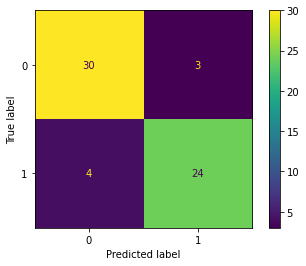

In [42]:
ConfusionMatrixDisplay.from_predictions(test_trues, test_preds)

plt.show()

In [43]:
print(classification_report(test_trues, test_preds,zero_division=1))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.89      0.86      0.87        28

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [44]:
print(accuracy_score(test_trues, test_preds))

0.8852459016393442


<AxesSubplot:>

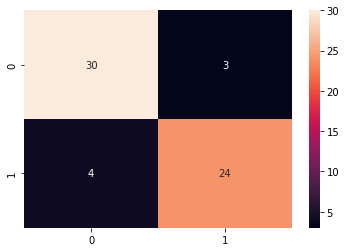

In [45]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_trues, test_preds))

sns.heatmap(confusion_matrix_df, annot=True)

In [46]:
testloss

tensor(0.4770)

In [47]:
 print("AUC score is: ", roc_auc_score(test_data_label,probs[:,1]))

AUC score is:  0.9047619047619047


In [48]:
 print("Loss score is: ", log_loss(test_trues,probs))

Loss score is:  0.3722535881794012


In [49]:
execution_time_ann

'0.3162'

In [50]:
ann_accuracy='%.4f'% accuracy_score(test_trues, test_preds)
# 0.7386

ann_f1='%.4f'% f1_score(test_trues, test_preds, average='micro')
# 0.7273

ann_roc_auc='%.4f'% roc_auc_score(test_data_label,probs[:,1])
# 0.8603

In [51]:
ann_roc_auc

'0.9048'

In [52]:
ann_loss='%.4f'% testloss


In [53]:
ann_loss

'0.4770'

In [54]:
HD_dict = { 
              'accuracy':[lgbm_accuracy,svc_accuracy,rf_accuracy,ann_accuracy],
               'f1_score': [lgbm_f1,svc_f1,rf_f1,ann_f1],
               'roc_auc': [lgbm_roc_auc,svc_roc_auc,rf_roc_auc,ann_roc_auc],
               'cross_entropy_loss': [lgbm_loss,svc_loss,rf_loss,ann_loss],
                'training_time[s]':[training_time_lgbm,training_time_svm,training_time_rf,execution_time_ann]
               }
pr_df_hd = pd.DataFrame(HD_dict,index=['Light GBM','SVM','Random Forest','PyTorch ANN'])
pr_df_hd

,accuracy,f1_score,roc_auc,cross_entropy_loss,training_time[s]
Light GBM,0.8361,0.8361,0.9405,0.3494,0.0331
SVM,0.8525,0.8525,0.9481,0.3258,0.0058
Random Forest,0.8852,0.8852,0.9307,0.3635,0.1153
PyTorch ANN,0.8852,0.8852,0.9048,0.4770,0.3162


In [55]:
pr_df_hd.to_csv('HD Score.csv')